In [1]:
import mnist_data_loader
import matplotlib.pyplot as plt
import numpy as np

mnist_dataset = mnist_data_loader.read_data_sets("./MNIST_data/", one_hot=False)
# training dataset
train_set = mnist_dataset.train
# test dataset
test_set = mnist_dataset.test
print('Training dataset size: ', train_set.num_examples)
print('Test dataset size: ', test_set.num_examples)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Training dataset size:  12049
Test dataset size:  1968


3


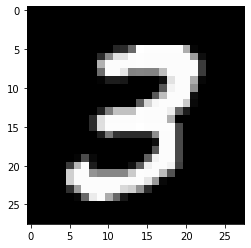

In [2]:
example_id = 0
image = train_set.images[example_id] # shape = 784 (28*28)
label = train_set.labels[example_id] # shape = 1
print(label)
plt.imshow(np.reshape(image,[28,28]),cmap='gray')
plt.show()

In [3]:
#logistic regression
batch_size = 1000
max_epoch = 200
learning_rate = 0.01

#zero weights
weights = np.zeros((train_set.images[0].shape[0], 1)) 
bias = 0


def sigmoid(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def calc_accuracy(y, y_hat):
    correct = y == y_hat
    return np.sum(correct) / correct.shape[0]

losses = []
accuracies = []

for epoch in range(0, max_epoch):
    iter_per_batch = train_set.num_examples // batch_size
    for batch_id in range(0, iter_per_batch):
        # get the data of next minibatch (have been shuffled)
        batch = train_set.next_batch(batch_size)
        input_batch_size, label = batch
        
        #prediction
        y = (label.reshape(label.shape[0], 1) - 3) / 3
        Z = np.dot(input_batch_size, weights) + bias
        S = sigmoid(Z)
        y_hat = S >= 0.5
                
        #loss and accuracy)
        loss = (-1.0) * np.mean(np.multiply(y, np.log(S)) + np.multiply(1.0-y, np.log(1.0 - S)))
        accuracy = calc_accuracy(y, y_hat)
        
        losses.append(loss)
        accuracies.append(accuracy)
        
        # update weights
        dw = np.dot(input_batch_size.T, np.transpose(sigmoid(Z) - y).T) * (1.0/input_batch_size.shape[1])
        db = np.mean((S - y))
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db
        

        
        

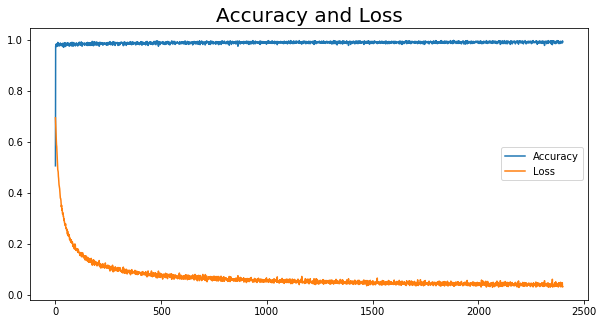

In [4]:
# plot results
plt.figure(figsize=(10, 5))
plt.title('Accuracy and Loss', fontsize=20)
plt.plot(accuracies)
plt.plot(losses)
plt.legend(['Accuracy', 'Loss'], loc=0)
plt.show()

In [5]:
#accuracy
average_accuracy= (sum(accuracies)/len(accuracies))
fd_average_accuracy = "{:.4f}".format(average_accuracy)
print("average accuracy: "+ fd_average_accuracy)

#loss
average_loss = float(sum(losses)/len(losses))
fd_average_loss = "{:.4f}".format(average_loss)
print("average loss : "+ fd_average_loss)

average accuracy: 0.9879
average loss : 0.0697
